# Hyperparameter Tuning
알고리즘을 미세 조정하여 높은 성능의 머신 러닝 모델을 만들고 성능을 평가하는 방법을 기술한다.
- 머신러닝 모델 성능 평가하기
- 머신러닝 알고리즘에서 일반적으로 발생하는 문제 분석하기
- 머신러닝 모델 세부 튜닝하기
- 여러가지 성능 지표를 사용하여 모델의 예측 성능 평가하기

## 파이프라인을 사용한 Workflow
테스트 데이터셋에 있는 별도의 샘플처럼 새로운 데이터의 스케일을 조정하고 압축하기 위해 훈련 데이터셋에서 학습한 파라미터를 재사용해야한다. 이를 위해 sklearn의 Pipeline 클래스를 여기서 기술한다. 이 도구를 사용하여 여러 개의 변환 단계를 포함한 모델을 학습하고 새로운 데이터에 대한 예측을 만들 수 있다.

### 위스콘신 유방암 데이터셋
이 데이터는 악성과 양성인 종양 세포 샘플이 포함되어 있다. 데이터셋의 첫 두열에는 샘플의 고유 ID번호와 진단결과 (M=악성,B=양성)가 들어있습니다. 3번째부터 32번째까지는 이미지에서 추출한 특성이 실수 값으로 들어있습니다.

In [1]:
# pandas를 활용하여 데이터를 로드합니다.
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
# LabelEncoder를 사용하여 정수로 변환.
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)

### 파이프라인으로 변환기와 추정기 연결

StandardScaler, PCA, LogisticRegression 객체를 하나의 파이프라인으로 구성하는 예제입니다.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: ', pipe_lr.score(X_test,y_test))

테스트 정확도:  0.956140350877193


## K-fold cross-validation
적절한 bias-variance(편향-분산) trade-off를 찾으려면 모델을 주의 깊게 평가해야합니다. 이 절에서는 보편적인 교차검증 기법 **Holdout Cross-Validation**과 **K-fold cross-Validation**을 서술합니다.

### Holdout cross validation
지금까지 해왔던 방식으로 데이터를 학습셋/테스트셋으로 나누어서 학습을 진행하고, parameter Tuning을 하게되면 결국 테스트셋으로 학습을 하는 결과와 비슷한 결과가 나오게 됩니다. 테스트셋으로 모델 선택($\approx$Tuning)이 진행되어서 테스트셋에 과적합 된 모델이 나오게 됩니다.

이러한 문제를 방지하기위해, 데이터를 학습셋/검증셋/테스트셋 으로 나누어 학습과 모델선택, 결과 확인에 사용합니다. 훈련과 모델선택에서 사용된 적 없는 데이터를 사용하여 모델을 평가하기 때문에 일반화 능력을 덜 편향되게 추정할 수 있는 장점이 있습니다.

### K-fold cross-validation
k-겹 교차검증은 중복을 허용하지 않고, 훈련 데이터셋을 k개의 Fold로 랜덤하게 나눕니다. k-1개의 폴드로 모델을 훈련하고 나머지 하나의 폴드로 성능을 평가합니다. 그다음 서로 다른 독립적은 폴드에서 얻은 성능 추정을 기반으로 모델의 평균 성능을 계산합니다. 일반적으로 모델 튜닝에 k-fold 교차검증을 사용합니다. 만족스러운 하이퍼파라미터를 찾은 후에는 전체 훈련 데이터셋(Not folded)을  사용하여 모델을 다시 훈련합니다. k-fold 교차검증 후에 전체 훈련 데이터셋으로 모델을 학습하는 이유는 훈련 샘플이 많을수록 알고리즘이 정확하고 안정적인 모델을 만들기 때문입니다.

일반적으로 10-fold 교차검증이 가장 뛰어난 bias-variance(편향-분산) trade-off를 가진다고 한다.
데이터가 적을 때는 Fold를 늘리고, 데이터가 많다면 5-fold 도 유의미한 성능을 가진다. fold가 줄어들면 학습하고 평가하는 계산 비용을 줄일 수 있습니다.

#### Stratified K-fold cross-validation
Classification에서 사용. 클래스간의 비율이 동등하지 않을 때 사용한다. 



In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1) # n_jobs = cpu 할당 개수. -1은 전체 할당.
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV 정확도: 0.950 +/- 0.014


## 학습곡선과 검증곡선을 사용한 알고리즘 디버깅
학습 곡선과 검증 곡선을 사용하여 과대적합과 과소적합을 분석합니다.

### 학습 곡선으로 편향과 분산 문제 분석

In [8]:
from IPython.display import Image
Image(url='https://git.io/JtsTi', width=600) 

- High bias: 문제 해결을 위해선 추가적인 특성을 수집하거나 규제 강도를 줄여야 한다.
- High variance: 더 많은 훈련데이터를 모아서 모델 복잡도를 낮추거나 규제를 증가 시킨다.

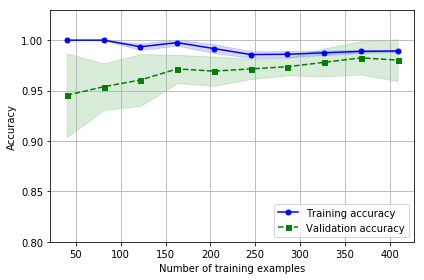

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10), #0.1 ~ 1.0 까지 10개로 나눔
                               cv=10, # 10개의 fold
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

### 검증곡선으로 과대적합과 과소적합 조사
규제 레벨에따라 검증 곡선을 그리고 과대,과소 적합을 조사한다.

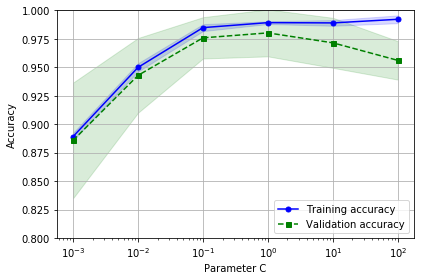

In [11]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

$10^{-2}$,$10^{-1}$ 구간에서 가장 유효한 규제레벨을 확인할 수 있다.

### 그리드 서치를 사용한 머신러닝 모델 세부 튜닝

그리드에 하이퍼파라미터를 넣어서 최적화된 하이퍼 파라미터를 찾습니다. 


https://ichi.pro/ko/hyperopt-beijian-choejeoghwaleul-giban-eulo-han-haipeo-palamiteo-tyuning-140338828128041
https://teddylee777.github.io/thoughts/hyper-opt

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [13]:
clf = gs.best_estimator_

# refit=True로 지정했기 때문에 다시 fit() 메서드를 호출할 필요가 없습니다.
# clf.fit(X_train, y_train)

print('테스트 정확도: %.3f' % clf.score(X_test, y_test))

테스트 정확도: 0.974



https://teddylee777.github.io/thoughts/hyper-opt

- RandomizedSearchCV는 정해진 횟수(iteration) 안에서 정의된 Hyper Parameter의 후보군들로부터의 조합을 랜덤하게 샘플링하여 최소의 오차를 갖는 모델의 하이퍼 파라미터를 찾아 줍니다. 후보군을 신중히 결정해야하며, 랜덤한 조합들 중 최적의 하이퍼 파라미터를 찾는 다는 보장은 없습니다. 횟수를 늘려주면 그만큼 시간도 비례하게 증가한다는 단점이 있습니다.
- GridSearchCV는 모델의 하이퍼 파라미터 후보군 들을 완전 탐색하여 하이퍼 파라미터를 찾아냅니다. 후보군의 개수가 많으면 많을수록 기하급수적으로 찾는 시간은 오래 걸리며 후보군들을 잘 설정해줘야 합니다.

-> bayesian optimization
https://ichi.pro/ko/hyperopt-beijian-choejeoghwaleul-giban-eulo-han-haipeo-palamiteo-tyuning-140338828128041

#### Nested cross-validation 중첩 교차 검증을 사용한 알고리즘 선택
K-겹 교차 검증을 **훈련 폴드** 와 **테스트 폴드** 로 나눕니다.

**훈련 폴드**를 다시 **훈련 폴드** 와 **검증 폴드** 로 나눕니다.

훈련폴드에서 검증폴드를 사용하여 검증을 완료한 뒤 테스트 폴드에 테스트를 하는 방식.

In [14]:
Image(url='https://git.io/JtsTP', width=500) 